In [5]:
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Create folder to save dataset
base_dir = '../../data/'
raw_dir = os.path.join(base_dir, 'raw')
curated_dir = os.path.join(base_dir, 'curated')
manual_dir = os.path.join(base_dir, 'manual')
landing_dir = os.path.join(base_dir, 'landing')

if not os.path.exists(base_dir):
    os.makedirs(base_dir)

if not os.path.exists(curated_dir):
    os.makedirs(curated_dir)

In [7]:
# read data
df = pd.read_csv(f"{raw_dir}/individual_property_unpreprocessed.csv")

In [8]:
df.head(5)

,Address,Cost,Property Type,Bedrooms,Bathrooms,Latitude,Longitude,Closest Gov Secondary School,Gov Secondary Distance,Age under 20,...,population 2023,2016 income,2017 income,2018 income,2019 income,2020 income,LGA_CODE24,Year,Year ending,Incidents Recorded
0,"8/90 Hambleton Street, Middle Park VIC 3206",$410.00,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,16861.0,"10,997","11,489","11,682","11,683","11,068",25900.0,2024.0,March,10048.0
1,"8/90 Hambleton Street, Middle Park VIC 3206",$410.00,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,16861.0,"10,997","11,489","11,682","11,683","11,068",25900.0,2023.0,March,9809.0
2,"8/90 Hambleton Street, Middle Park VIC 3206",$410.00,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,16861.0,"10,997","11,489","11,682","11,683","11,068",25900.0,2022.0,March,9136.0
3,"8/90 Hambleton Street, Middle Park VIC 3206",$410.00,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,16861.0,"10,997","11,489","11,682","11,683","11,068",25900.0,2021.0,March,10172.0
4,"8/90 Hambleton Street, Middle Park VIC 3206",$410.00,Apartment,1,1,-37.847553,144.960477,Albert Park College,1.2 km away,36%,...,16861.0,"10,997","11,489","11,682","11,683","11,068",25900.0,2020.0,March,9956.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71017 entries, 0 to 71016
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Address                       71017 non-null  object 
 1   Cost                          71017 non-null  object 
 2   Property Type                 71017 non-null  object 
 3   Bedrooms                      71017 non-null  int64  
 4   Bathrooms                     71017 non-null  int64  
 5   Latitude                      71017 non-null  float64
 6   Longitude                     71017 non-null  float64
 7   Closest Gov Secondary School  62182 non-null  object 
 8   Gov Secondary Distance        62182 non-null  object 
 9   Age under 20                  70154 non-null  object 
 10  Age 20-39                     70154 non-null  object 
 11  Age 40-59                     70154 non-null  object 
 12  Age 60+                       70154 non-null  object 
 13  P

# Preprocessing

In [10]:
df.shape

(71017, 32)

In [11]:
# duplicate record
duplicate_rows = df[df.duplicated()]
print(f"duplicate records: {duplicate_rows.shape[0]}")

duplicate records: 7867


In [12]:
df_cleaned = df.drop_duplicates()
df_cleaned.shape

(63150, 32)

# Remove unvalid records
- unvalid address
- zero value in number of bedrooms or bathrooms

In [14]:
# Use a regular expression to find rows where the address matches the condition
# The condition is: the last four characters are digits, and the rest of the address has no digits
df_filtered = df_cleaned[~df_cleaned['Address'].str.match(r'^[^\d]*\d{4}$')]

print(df_filtered)


                                           Address     Cost Property Type  \
0      8/90 Hambleton Street, Middle Park VIC 3206  $410.00     Apartment   
1      8/90 Hambleton Street, Middle Park VIC 3206  $410.00     Apartment   
2      8/90 Hambleton Street, Middle Park VIC 3206  $410.00     Apartment   
3      8/90 Hambleton Street, Middle Park VIC 3206  $410.00     Apartment   
4      8/90 Hambleton Street, Middle Park VIC 3206  $410.00     Apartment   
...                                            ...      ...           ...   
71012      17 Freeman Crescent, Baranduda VIC 3691     $750         House   
71013      17 Freeman Crescent, Baranduda VIC 3691     $750         House   
71014      17 Freeman Crescent, Baranduda VIC 3691     $750         House   
71015      17 Freeman Crescent, Baranduda VIC 3691     $750         House   
71016      17 Freeman Crescent, Baranduda VIC 3691     $750         House   

       Bedrooms  Bathrooms   Latitude   Longitude  \
0             1       

In [15]:
# Remove rows where 'Bedrooms' or 'Bathrooms' columns have a value of 0
filtered_df = df_filtered[(df_filtered['Bedrooms'] != 0) & (df_filtered['Bathrooms'] != 0)]

filtered_df.shape

(70444, 32)

In [16]:
filtered_df.describe()

,Bedrooms,Bathrooms,Latitude,Longitude,Postcode,SA2_CODE21,population 2016,population 2017,population 2018,population 2019,population 2020,population 2021,population 2022,population 2023,LGA_CODE24,Year,Incidents Recorded
count,70444.000000,70444.000000,70444.000000,70444.000000,70444.000000,7.044100e+04,70441.000000,70441.000000,70441.000000,70441.000000,70441.000000,70441.000000,70441.000000,70441.000000,70441.000000,70060.000000,70060.000000
mean,2.499801,1.425033,-37.758769,144.908432,3187.482184,2.083166e+08,15066.812339,15357.907696,15607.138158,15827.733522,15924.990602,15472.230959,15655.462614,16244.031601,24087.382490,2019.500000,10123.112318
std,0.943268,0.561622,0.505795,1.086013,211.657197,3.621848e+06,4629.197834,4622.320703,4611.087732,4618.677450,4643.060606,4616.578185,4707.849107,4908.268399,1990.520115,2.872302,5605.602007
min,1.000000,1.000000,-38.477668,0.000000,3000.000000,2.010110e+08,91.000000,88.000000,86.000000,83.000000,81.000000,78.000000,78.000000,78.000000,20570.000000,2015.000000,141.000000
25%,2.000000,1.000000,-37.883456,144.889795,3056.000000,2.060415e+08,11914.000000,12323.000000,12452.000000,12628.000000,12721.000000,12137.000000,12284.000000,12921.000000,22410.000000,2017.000000,6436.000000
50%,3.000000,1.000000,-37.818813,144.989820,3132.000000,2.070312e+08,14826.000000,15054.000000,15415.000000,15554.000000,15648.000000,15410.000000,15349.000000,15585.000000,24330.000000,2019.500000,8941.000000
75%,3.000000,2.000000,-37.759746,145.088734,3199.000000,2.120313e+08,18523.000000,18744.000000,18975.000000,19260.000000,19414.000000,18791.000000,18939.000000,19969.000000,25900.000000,2022.000000,11797.000000
max,4.000000,4.000000,0.000000,147.655880,3977.000000,2.170415e+08,25324.000000,26468.000000,27272.000000,27895.000000,28306.000000,28594.000000,28727.000000,31976.000000,27450.000000,2024.000000,28116.000000


# Simplified data
Clean the following features, only leave numerical values:

'Cost', 'Gov Secondary Distance', 'Age under 20', 'Age 20-39', 'Age 40-59', and 'Age 60+'

In [17]:
filtered_df.iloc[1]

Address                         8/90 Hambleton Street, Middle Park VIC 3206
Cost                                                                $410.00
Property Type                                                     Apartment
Bedrooms                                                                  1
Bathrooms                                                                 1
Latitude                                                         -37.847553
Longitude                                                        144.960477
Closest Gov Secondary School                            Albert Park College
Gov Secondary Distance                                          1.2 km away
Age under 20                                                            36%
Age 20-39                                                               15%
Age 40-59                                                               30%
Age 60+                                                                 19%
Postcode    

In [18]:
# Function to extract the numeric part after the first "$"
def extract_first_dollar_amount(value):
    # Search for the numeric part following the first $
    match = re.search(r'\$(\d{1,3}(?:,\d{3})*(?:\.\d{2})?)', value)
    if match:
        # Remove any commas from the matched value and convert to float
        return float(match.group(0).replace(',', '').replace('$', ''))
    return None  # If no match is found, return None


# Apply the function to the 'Cost' column
filtered_df['Cost(numeric)'] = filtered_df['Cost'].apply(lambda x: extract_first_dollar_amount(str(x)))


# Display one row to verify
filtered_df.iloc[1]

/var/folders/gv/pbj7gd456sj494dw3tvm283r0000gn/T/ipykernel_92594/4190137078.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cost(numeric)'] = filtered_df['Cost'].apply(lambda x: extract_first_dollar_amount(str(x)))


Address                         8/90 Hambleton Street, Middle Park VIC 3206
Cost                                                                $410.00
Property Type                                                     Apartment
Bedrooms                                                                  1
Bathrooms                                                                 1
Latitude                                                         -37.847553
Longitude                                                        144.960477
Closest Gov Secondary School                            Albert Park College
Gov Secondary Distance                                          1.2 km away
Age under 20                                                            36%
Age 20-39                                                               15%
Age 40-59                                                               30%
Age 60+                                                                 19%
Postcode    

In [19]:
# Simplified 'Gov Secondary Distance'
# Skip NaN values
# Extract numeric values

# Function to extract the numeric part from 'Gov Secondary Distance', and handle NaN and invalid values
def extract_numeric_distance(value):
    if pd.isna(value):  # Check if the value is NaN
        return None
    match = re.search(r'(\d+\.?\d*)', value)  # Search for the numeric part
    if match:
        return float(match.group(1))  # Return the matched numeric part
    return None  # If no valid numeric value is found, return None

filtered_df['Gov Secondary Distance (numeric)'] = filtered_df['Gov Secondary Distance'].apply(lambda x: extract_numeric_distance(str(x)))
filtered_df.iloc[1]


/var/folders/gv/pbj7gd456sj494dw3tvm283r0000gn/T/ipykernel_92594/2054363305.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Gov Secondary Distance (numeric)'] = filtered_df['Gov Secondary Distance'].apply(lambda x: extract_numeric_distance(str(x)))


Address                             8/90 Hambleton Street, Middle Park VIC 3206
Cost                                                                    $410.00
Property Type                                                         Apartment
Bedrooms                                                                      1
Bathrooms                                                                     1
Latitude                                                             -37.847553
Longitude                                                            144.960477
Closest Gov Secondary School                                Albert Park College
Gov Secondary Distance                                              1.2 km away
Age under 20                                                                36%
Age 20-39                                                                   15%
Age 40-59                                                                   30%
Age 60+                                 

In [20]:
# Rename numeric columnbs
df_drop = filtered_df.drop(['Cost', 'Gov Secondary Distance'], axis=1)
df_drop = df_drop.rename(columns={'Cost(numeric)': 'Cost', 'Gov Secondary Distance (numeric)': 'Gov Secondary Distance'})
df_drop.iloc[1]

Address                         8/90 Hambleton Street, Middle Park VIC 3206
Property Type                                                     Apartment
Bedrooms                                                                  1
Bathrooms                                                                 1
Latitude                                                         -37.847553
Longitude                                                        144.960477
Closest Gov Secondary School                            Albert Park College
Age under 20                                                            36%
Age 20-39                                                               15%
Age 40-59                                                               30%
Age 60+                                                                 19%
Postcode                                                               3206
SA2_CODE21                                                      206051128.0
population 2

In [21]:
# Remove '%' symbol for columns 'Age under 20', 'Age 20-39', 'Age 40-59', 'Age 60+'

# List of columns with percentage values
percentage_columns = ['Age under 20', 'Age 20-39', 'Age 40-59', 'Age 60+']

# Loop through each column to remove '%' symbol
df_drop[percentage_columns] = df_drop[percentage_columns].apply(lambda x: x.str.replace('%', ''))

# Display the updated dataframe
df_drop.head()


,Address,Property Type,Bedrooms,Bathrooms,Latitude,Longitude,Closest Gov Secondary School,Age under 20,Age 20-39,Age 40-59,...,2017 income,2018 income,2019 income,2020 income,LGA_CODE24,Year,Year ending,Incidents Recorded,Cost,Gov Secondary Distance
0,"8/90 Hambleton Street, Middle Park VIC 3206",Apartment,1,1,-37.847553,144.960477,Albert Park College,36,15,30,...,"11,489","11,682","11,683","11,068",25900.0,2024.0,March,10048.0,410.0,1.2
1,"8/90 Hambleton Street, Middle Park VIC 3206",Apartment,1,1,-37.847553,144.960477,Albert Park College,36,15,30,...,"11,489","11,682","11,683","11,068",25900.0,2023.0,March,9809.0,410.0,1.2
2,"8/90 Hambleton Street, Middle Park VIC 3206",Apartment,1,1,-37.847553,144.960477,Albert Park College,36,15,30,...,"11,489","11,682","11,683","11,068",25900.0,2022.0,March,9136.0,410.0,1.2
3,"8/90 Hambleton Street, Middle Park VIC 3206",Apartment,1,1,-37.847553,144.960477,Albert Park College,36,15,30,...,"11,489","11,682","11,683","11,068",25900.0,2021.0,March,10172.0,410.0,1.2
4,"8/90 Hambleton Street, Middle Park VIC 3206",Apartment,1,1,-37.847553,144.960477,Albert Park College,36,15,30,...,"11,489","11,682","11,683","11,068",25900.0,2020.0,March,9956.0,410.0,1.2


# Missing value

In [ ]:
# missing value
print("number of missing value in each column：")
print(df_drop.isnull().sum())

In [ ]:
# remove record with missing .......
df_drop = df_drop.dropna(subset=[.....])

In [ ]:
# fill in missing value in 'Incidents Recorded' by average CRIMINAL INCIDENT RATE in Victoria
# df_drop['Incidents Recorded'] = df_drop['Incidents Recorded'].fillna(5279.3)

In [ ]:
# fill in missing value in 'Gov Secondary Distance' by -1 to represent no close school
# df_drop['Gov Secondary Distance'] = df_drop['Gov Secondary Distance'].fillna(-1)

In [ ]:
# fill in missing value in 'Age under 20', 'Age 20-39', 'Age 40-59' and 'Age 60+' by mean value
columns_to_fill = ['Age under 20', 'Age 20-39', 'Age 40-59', 'Age 60+']

for column in columns_to_fill:
    df_drop[column] = df_drop[column].fillna(df_drop[column].mean())


In [ ]:
# missing value
print("number of missing value in each column：")
print(df_drop.isnull().sum())

# Remove Outlier

In [18]:
def plot_boxplots(df, feature):
    """
    Plots a box plot for a specified column in the DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing numeric feature columns.
    feature (str): The column that you want to observe.
    """
    # Set up the figure
    plt.figure(figsize=(8, 6))

    # Boxplot for the feature
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')

    # Show the plot
    plt.tight_layout()
    plt.show()

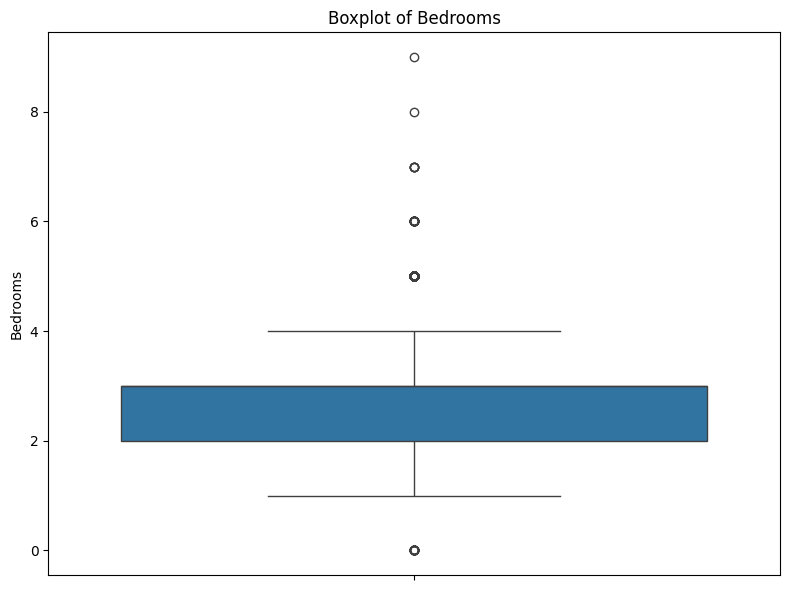

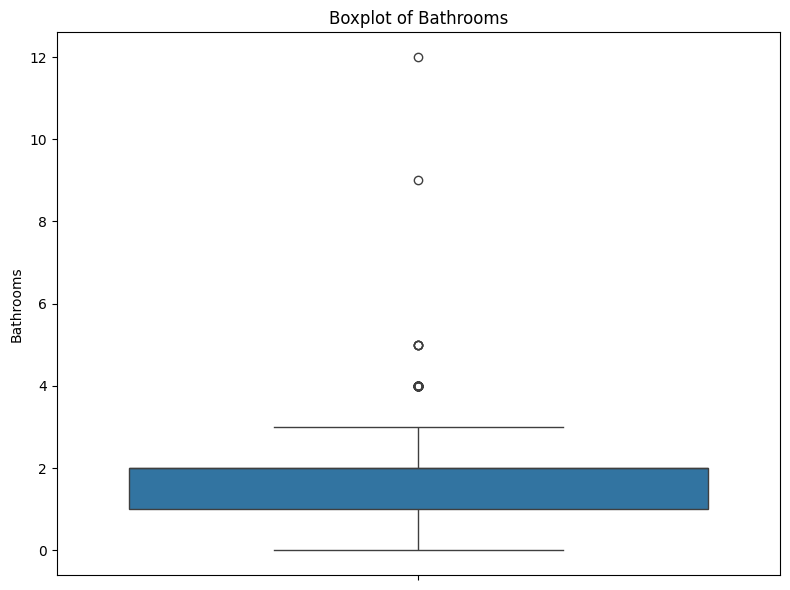

In [19]:
plot_boxplots(df_drop, 'Bedrooms')  # For Bedrooms
plot_boxplots(df_drop, 'Bathrooms')  # For Bathrooms

In [20]:
df_drop.shape

(7929, 27)

In [21]:
def outlier_remover(df, column_name):
    """
    Removes outliers from a specified column in the DataFrame using the IQR method with a custom multiplier for N > 100.

    Parameters:
    df (pandas.DataFrame): The DataFrame to process.
    column_name (str): The name of the column from which to remove outliers.

    Returns:
    pandas.DataFrame: DataFrame with outliers removed.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Get the number of records (N)
    N = len(df)
    
    # Apply the formula for N > 100
    multiplier = np.sqrt(np.log(N) - 0.5)
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    # Filter the DataFrame to exclude outliers
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return filtered_df

In [22]:
df_drop = outlier_remover(df_drop, 'Cost')


# Convert DataType

In [23]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7470 entries, 0 to 8001
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Address                       7470 non-null   object 
 1   Bedrooms                      7470 non-null   float64
 2   Bathrooms                     7470 non-null   float64
 3   Closest Gov Secondary School  6430 non-null   object 
 4   Age under 20                  7290 non-null   object 
 5   Age 20-39                     7290 non-null   object 
 6   Age 40-59                     7290 non-null   object 
 7   Age 60+                       7290 non-null   object 
 8   Postcode                      7470 non-null   int64  
 9   latitude                      7470 non-null   float64
 10  longitude                     7470 non-null   float64
 11  SA2  code                     7464 non-null   float64
 12  income_2020                   7464 non-null   object 
 13  2023    

In [24]:
# convert to string type
string_columns = ['Address', 'Closest Gov Secondary School']
df_drop[string_columns] = df_drop[string_columns].astype(str)

In [25]:
# convert to float type, and remove ','
columns_to_convert = df_drop.columns.difference(string_columns)

df_drop[columns_to_convert] = df_drop[columns_to_convert].replace({',': ''}, regex=True).astype(float)
df_drop.iloc[1]

Address                         1207/270 King Street, Melbourne VIC 3000
Bedrooms                                                             2.0
Bathrooms                                                            2.0
Closest Gov Secondary School                      University High School
Age under 20                                                         6.0
Age 20-39                                                           83.0
Age 40-59                                                           10.0
Age 60+                                                              1.0
Postcode                                                          3000.0
latitude                                                      -37.813692
longitude                                                     144.954858
SA2  code                                                    206041505.0
income_2020                                                      59201.0
2023                                               

In [26]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7470 entries, 0 to 8001
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Address                       7470 non-null   object 
 1   Bedrooms                      7470 non-null   float64
 2   Bathrooms                     7470 non-null   float64
 3   Closest Gov Secondary School  7470 non-null   object 
 4   Age under 20                  7290 non-null   float64
 5   Age 20-39                     7290 non-null   float64
 6   Age 40-59                     7290 non-null   float64
 7   Age 60+                       7290 non-null   float64
 8   Postcode                      7470 non-null   float64
 9   latitude                      7470 non-null   float64
 10  longitude                     7470 non-null   float64
 11  SA2  code                     7464 non-null   float64
 12  income_2020                   7464 non-null   float64
 13  2023    

In [33]:
# Save the updated DataFrame if needed
df_drop.to_csv("../../data/curated/individual_property_preprocessed.csv", index=False)